### 1. Import the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize

from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

import pickle

### 2. Import the Dataset

In [2]:
df = pd.read_csv('Clean_Dataset.csv')

In [3]:
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### 3. EDA

In [4]:
df.shape

(300153, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [7]:
df = df.drop('Unnamed: 0', axis=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [9]:
for col in df.columns:
    if df[col].dtype=='object':
        print(col, ":", df[col].unique())

airline : ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
flight : ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
source_city : ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time : ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops : ['zero' 'one' 'two_or_more']
arrival_time : ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city : ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class : ['Economy' 'Business']


<Axes: xlabel='price', ylabel='Count'>

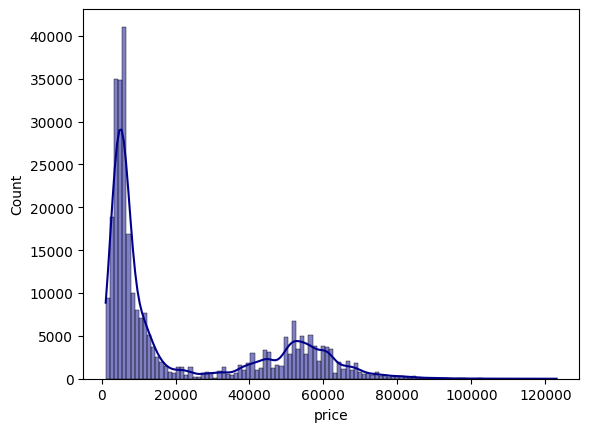

In [10]:
sns.histplot(data=df['price'] ,kde=True, color='darkblue')

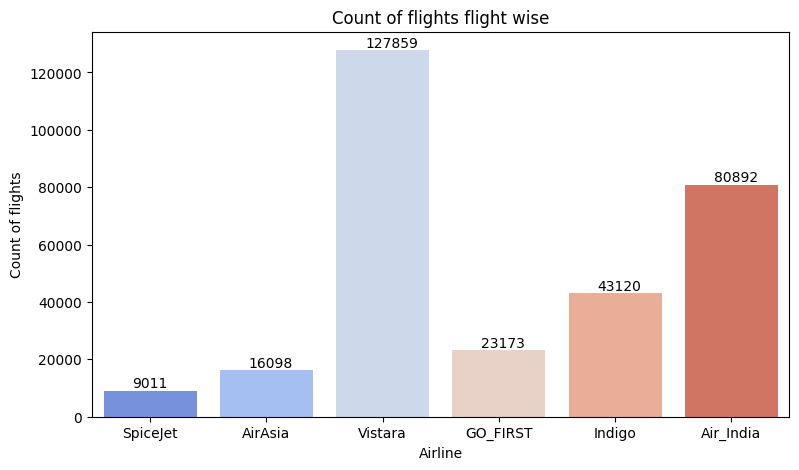

In [11]:
plt.figure(figsize = (9, 5))
plt.title('Count of flights flight wise')
ax=sns.countplot(x = 'airline', data = df, palette='coolwarm')
plt.xlabel('Airline')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [12]:
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])
        print(le.classes_)

['AirAsia' 'Air_India' 'GO_FIRST' 'Indigo' 'SpiceJet' 'Vistara']
['6E-102' '6E-105' '6E-113' ... 'UK-994' 'UK-995' 'UK-996']
['Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai']
['Afternoon' 'Early_Morning' 'Evening' 'Late_Night' 'Morning' 'Night']
['one' 'two_or_more' 'zero']
['Afternoon' 'Early_Morning' 'Evening' 'Late_Night' 'Morning' 'Night']
['Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai']
['Business' 'Economy']


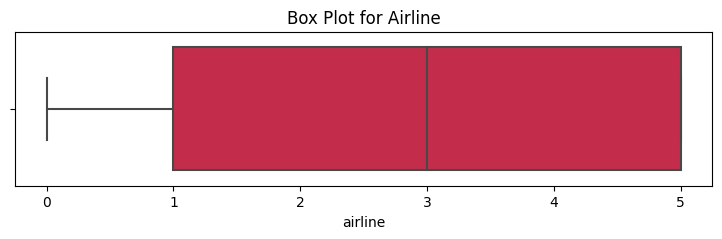

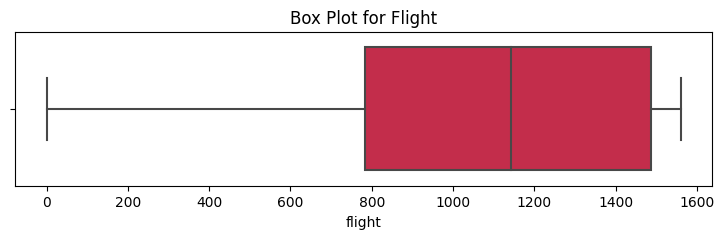

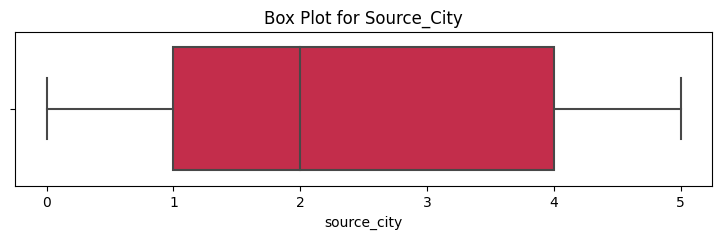

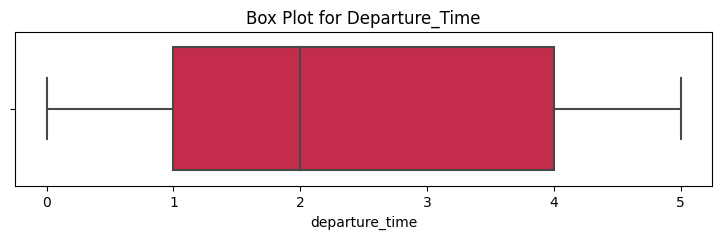

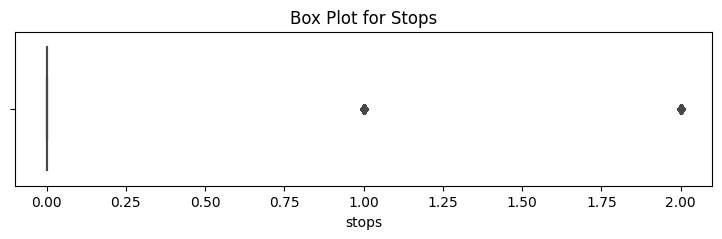

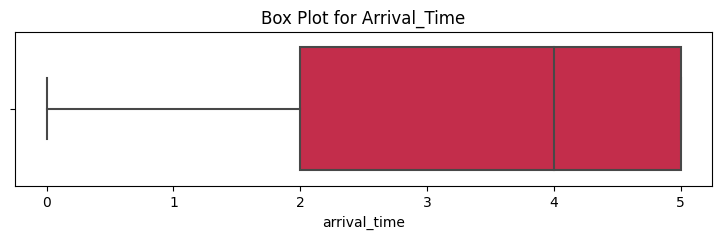

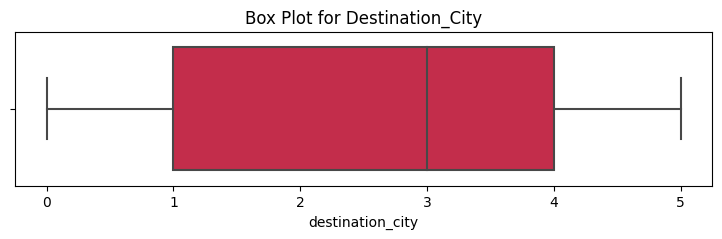

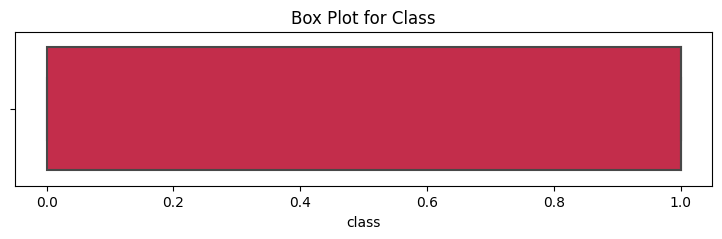

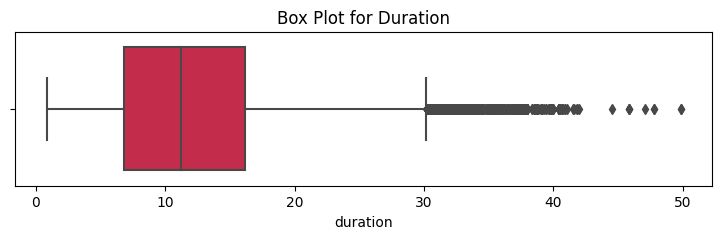

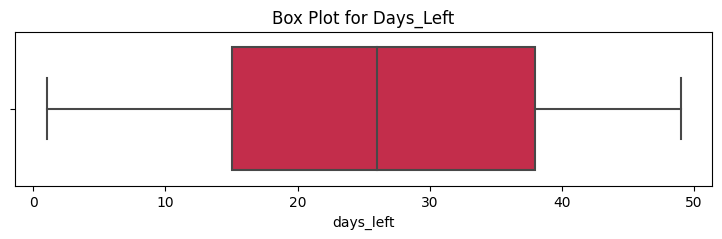

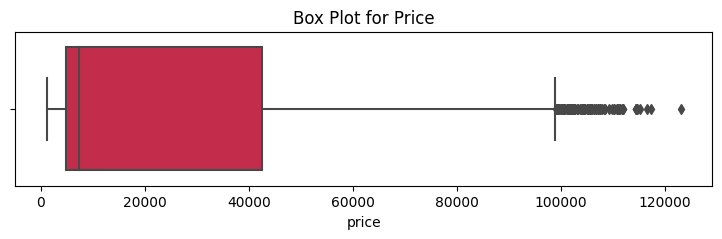

In [13]:
for col in df.columns:
    plt.figure(figsize = (9, 2))
    sns.boxplot(x = col, data = df.sort_values("price", ascending = False), color='crimson')
    plt.title(f'Box Plot for {col.title()}')
    plt.show()

In [14]:
df['duration'] = winsorize(df['duration'], limits=(0.001, 0.007))
df['price'] = np.log1p(df['price'])

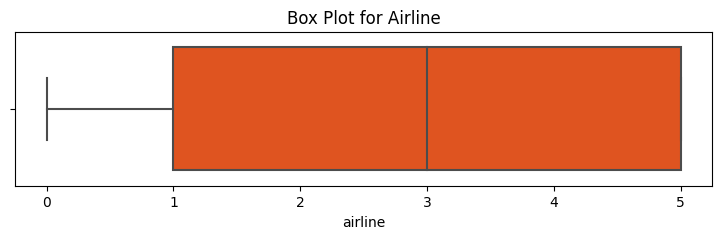

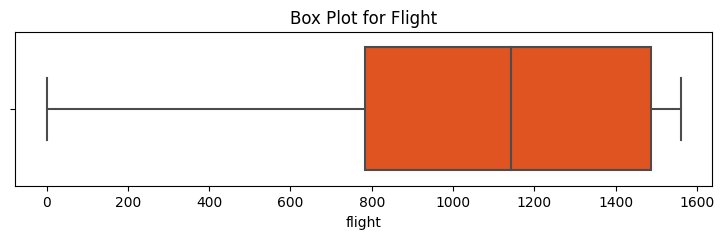

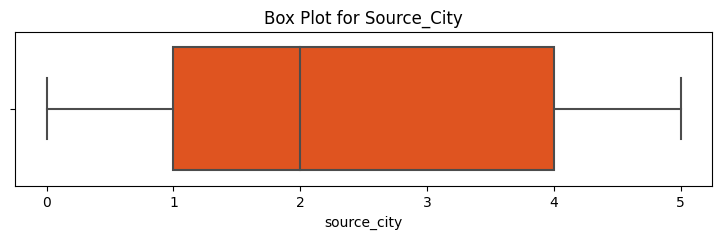

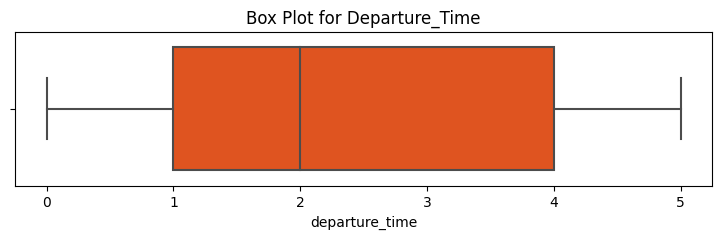

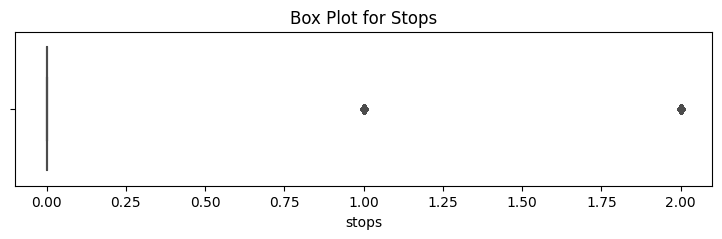

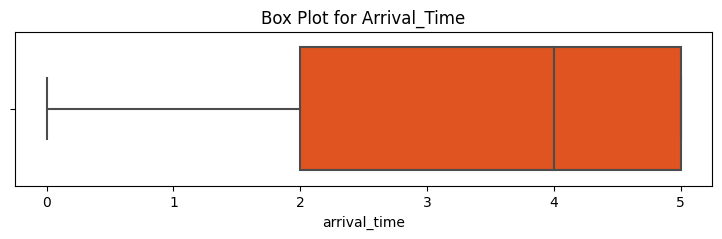

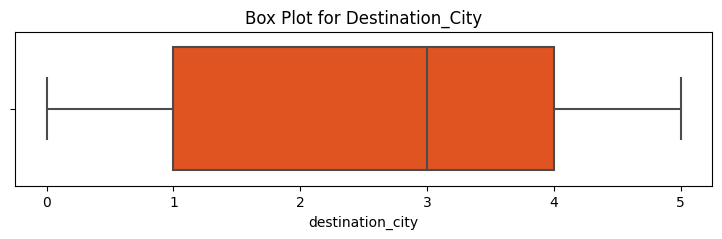

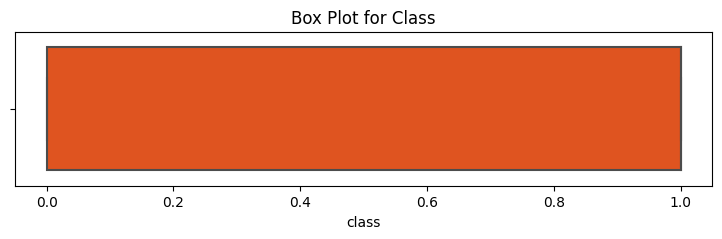

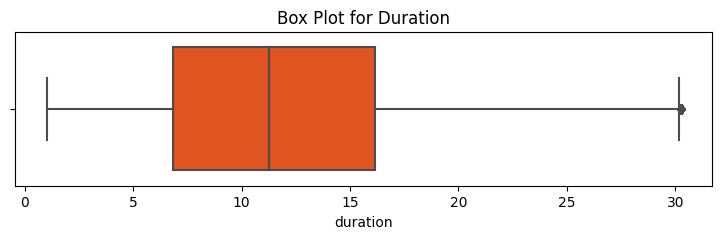

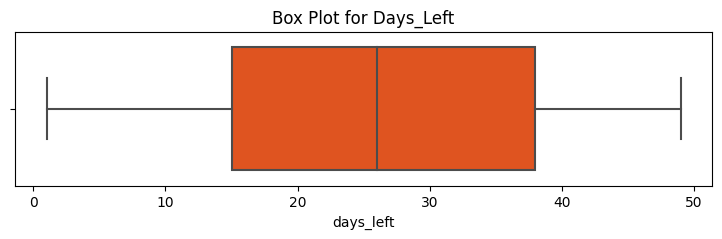

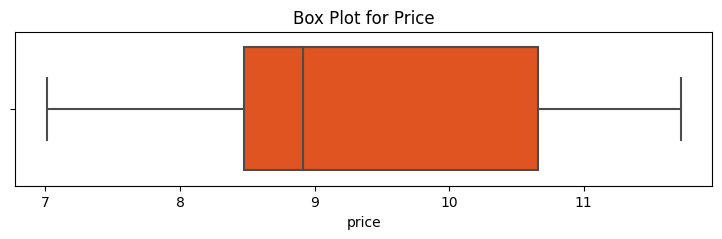

In [15]:
for col in df.columns:
    plt.figure(figsize = (9, 2))
    sns.boxplot(x = col, data = df.sort_values("price", ascending = False), color='orangered')
    plt.title(f'Box Plot for {col.title()}')
    plt.show()

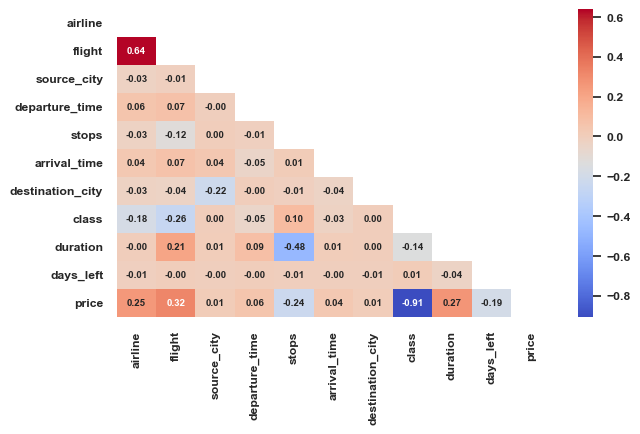

In [16]:
plt.figure(figsize = (7,4))
sns.set(font_scale=0.8, style='white')
font = {'family': 'sans-serif', 'style': 'normal', 'size': 7, 'weight': 700}
plt.rc('font', **font)
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = "coolwarm", mask=np.triu(df.corr()))
plt.show()

In [17]:
df = df.drop(['stops', 'days_left'], axis=1)

In [18]:
for col in df.columns:
    print(col, ":", df[col].unique())

airline : [4 0 5 2 3 1]
flight : [1408 1387 1213 ...  558  587  718]
source_city : [2 5 0 4 3 1]
departure_time : [2 1 4 0 5 3]
arrival_time : [5 4 1 0 2 3]
destination_city : [5 0 4 3 1 2]
class : [1 0]
duration : [ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   6.5  12.42 21.08 28.17 28.25  9.25
 17.92  7.08 13.83  7.58 15.83 24.42  4.17  4.25  5.08 29.33 17.   27.17
 24.75  5.75 12.75 13.75 17.83  5.5  23.83  5.   26.5  12.83  8.92 11.17
 12.17 15.58 15.75  7.92 13.25 16.   22.75  6.33  7.25 30.08 18.25  6.08
  2.   12.33  3.5  10.25 14.17 25.58  4.08  9.75  6.67  9.67 10.08 12.58
  7.    8.25 15.5  10.17 23.5  25.75 11.5  21.42 14.25  7.75  5.33  5.67
  4.75 19.33  6.25 10.33  9.08 15.42  4.83 25.83  7.5  27.58 28.42  6.42
 24.58 16.5  11.33 24.83 14.92 26.08  5.42 28.5  27.33 

### 4. Splitting the Dataset

In [19]:
X=df.drop(['price'],axis=1)
y=df['price']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### 5. Model Building

In [21]:
models = {'Bagging': BaggingRegressor(DecisionTreeRegressor(), n_estimators=10, random_state=42),
          'Decision Tree': DecisionTreeRegressor(),
          'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3),
          'KNN':KNeighborsRegressor(n_neighbors=5),
          'XGBoost': XGBRegressor()          
          }

In [22]:
metrics= {'MAE': make_scorer(mean_absolute_error),
          'MSE': make_scorer(mean_squared_error),
          'R2': make_scorer(r2_score)}

In [23]:
test_result = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R2'])

In [24]:
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)

    pd.set_option('display.float_format', '{:.2f}'.format)

    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    
    pd.set_option('display.float_format', '{:.2f}'.format)

    test_result = test_result._append({'Model': name, 'MAE': test_mae, 'MSE': test_mse, 'R2': test_r2}, ignore_index=True)

In [25]:
df_test_results = test_result.sort_values(by=['MAE'])
display(df_test_results)

,Model,MAE,MSE,R2
1,Decision Tree,0.21,0.09,0.92
0,Bagging,0.21,0.09,0.92
3,KNN,0.23,0.12,0.90
4,XGBoost,0.23,0.11,0.92
2,Gradient Boosting,0.27,0.13,0.90


### 6. Best Model - Decision Tree

In [26]:
predictor = DecisionTreeRegressor()
predictor.fit(X_train, y_train)
y_pred_rfc = predictor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rfc)
print('Accuracy:{:.2f}'.format(mae))

Accuracy:0.21


In [27]:
predictive_input = [5, 558, 3, 0, 3, 4, 1, 6.98]
predictive_input_array = np.asarray(predictive_input).reshape(1, -1)
prediction = predictor.predict(predictive_input_array)
print('Prediction: ' ,prediction)

Prediction:  [8.50868548]


### 7. Save the Model

In [28]:
filename = 'predictor_model.sav'
pickle.dump(predictor, open(filename, 'wb'))